In [23]:
import numpy as np


"""
1mm Hg = 0.00133322368 bar
1 kilopascal = 0.01 bar
"""
hg2mb=1.33322368 # mm Hg to millibar
mb2hg=0.750061683 # millibar to mm Hg

In [24]:
"""
http://www.gb.nrao.edu/~rmaddale/GBT/GBTMemo112.pdf
http://www.gb.nrao.edu/~rmaddale/GBT/Commissioning/Refraction/GBT%20Refraction.pdf
"""

def n1(T,Pd,Pw):
    """
    need temperature in C, Pressure of Dry air, Pressure from Water vapour in mmHg
    using the simplified version (fixed CO2 fraction)
    Liebe and Hopponen
    """
    B1=103.56
    B3=95.5
    B4=4.995e5
    K=T+273.15  # Celsius to Kelvin
    n16= B1*Pd/K  +(B3-B1)*Pw/K +B4*Pw/(K**2)
    n1=n16*1e-6
    return n1

def pw(T):
    """
    give a temperature in C and it will return pressure in pascal 
    W. Wagner and A. Pruss (1993) J. Phys. Chem. Reference Data, 22, 783–787.
    http://www.kayelaby.npl.co.uk/chemistry/3_4/3_4_2.html
    """
    Tc= 647.096 #Kelvin
    #pc=22064 #kpascal
    pc=220.64e3 #millibar
    a1=-7.85951783
    a2=1.84408259
    a3=-11.7866497
    a4= 22.6807411
    a5=-15.9618719
    a6=1.80122502
    # so much for the constants
    tau = 1- (T+273.15)/Tc
    lnp=(a1*tau + a2*tau**1.5 + a3*tau**3 +a4*tau**3.5 +a5*tau**4 +a6*tau**7.5)
    lnp=lnp*Tc/(T+273.15)
    p=np.exp(lnp)*pc
    return p

print pw(30), pw(100)

def crane(T,p,humid):
    """
    from Atmospheric Refractive Signal Bending and Propagation Delay Jeff Mangum 2009
    """
    rh=humid/100
    e=(1.0007 + 3.46e-6*p)*6.1121*np.exp(17.502*T/(T+240.97))
    pw=e*rh/(1-(1-rh)*e/p)
    return pw
print "Crane values", crane(30,900,100),crane(100,1014,100)
    

     

42.4691992715 1014.17993818
Crane values 42.5969408284 1040.51693939


In [25]:
pressure=900 #millibar
humid=30 # percent
T=30 #Celius
pwater = humid *pw(T)/100.0
print pwater

12.7407597815


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


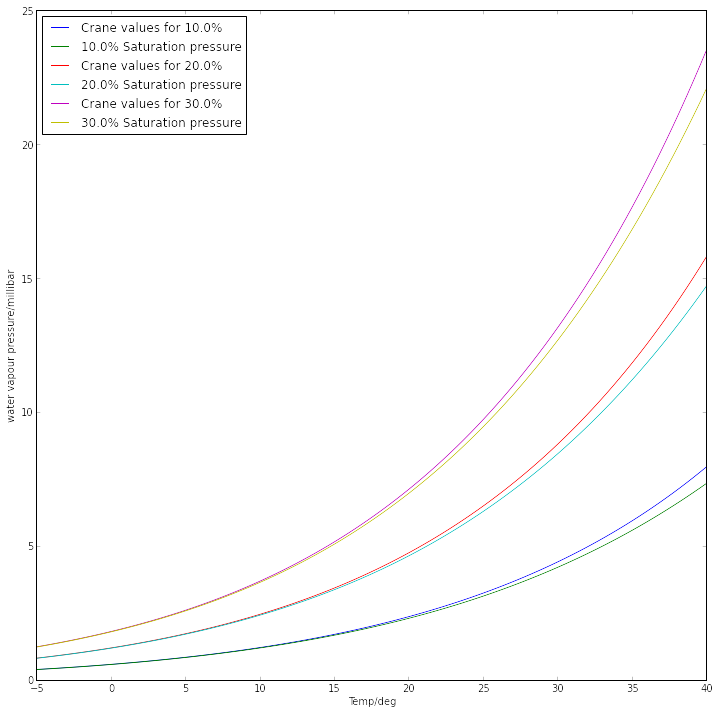

In [26]:
T=np.linspace(-5,40,100)
%pylab inline
pylab.figure(1,figsize(12,12))
pylab.xlabel('Temp/deg')
pylab.ylabel('water vapour pressure/millibar')
for humid in (10.,20.,30.):
    plot(T,crane(T,900,humid),label='Crane values for '+str(humid)+'%')
    plot(T,pw(T)*humid/100.0,label=str(humid)+'% Saturation pressure')
pylab.legend(loc='upper left')
pylab.show()

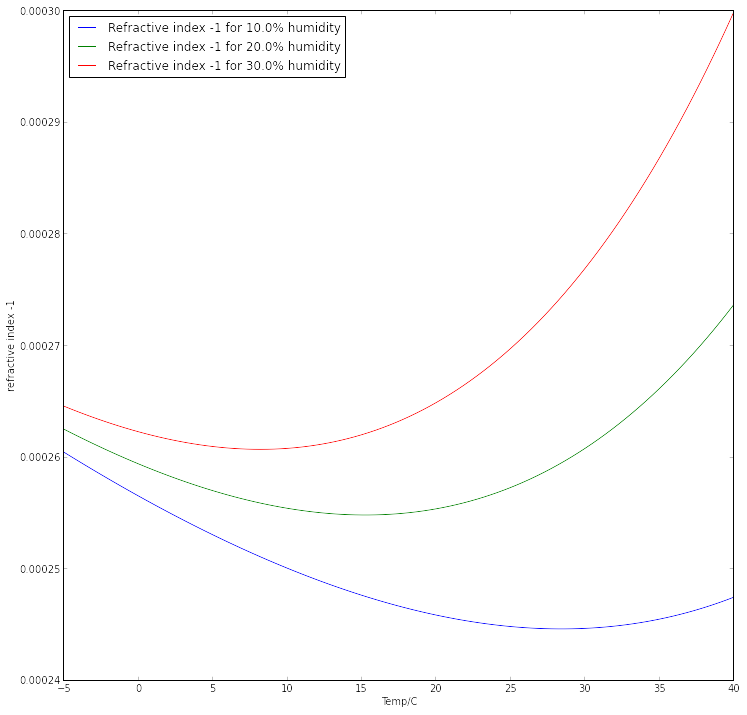

'\nWSRT uses fixed value of 0.00031 as default\nGBT has typical (290-300)*1e-6\n'

In [27]:
T=np.linspace(-5,40,100) # step through a sensible temperature range
Ptot=892 #millibar a typical pressure
for humid in (10., 20. , 30.):  # percent humidity
    pwet=pw(T)*humid/100. # fully saturated times %age humidity
    pdry=Ptot-pwet
    refr=n1(T,pdry*mb2hg,pwet*mb2hg)
    plot(T,refr,label='Refractive index -1 for '+str(humid)+'% humidity')
pylab.xlabel('Temp/C')
pylab.ylabel('refractive index -1')
pylab.legend(loc='upper left')
pylab.show()
"""
WSRT uses fixed value of 0.00031 as default
GBT has typical (290-300)*1e-6
"""

In [28]:
print pw(0)*mb2hg, pw(20)*mb2hg
T=30.
pwet=12
pdry=880
print n1(T,pdry*mb2hg,pwet*mb2hg)

4.58447335897 17.5453959095
0.00027416522325


In [29]:
n1=0.00026 # a trypical value

"""
Elevations given in degrees

"""

def vonhoerner(el):
    e=np.radians(el)
    cot=1./np.tan(np.radians(el+2.5))
    g=0.973*np.cos(e) / (sin(e) +0.00175*cot)
    return g
                        
def meeus(el):
    e=np.radians(el)
    S=1.02/np.tan(np.radians(el+10.3/(5.11+el)))
    g=S- 0.1185*np.sin(np.radians(14.69*S+7.57))
    return g
                     
    

def refract(n1,el):
    """
    Elevation in degrees
    http://www.gb.nrao.edu/~rmaddale/GBT/Commissioning/Refraction/GBT%20Refraction.pdf
    """
    C= 2.35e5 # arcseconds
    g=vonhoerner(el)  # also possible g=meeus(el)
    de=C*n1*g
    return de

print refract(260e-6,45)
    
    

59.3157834318


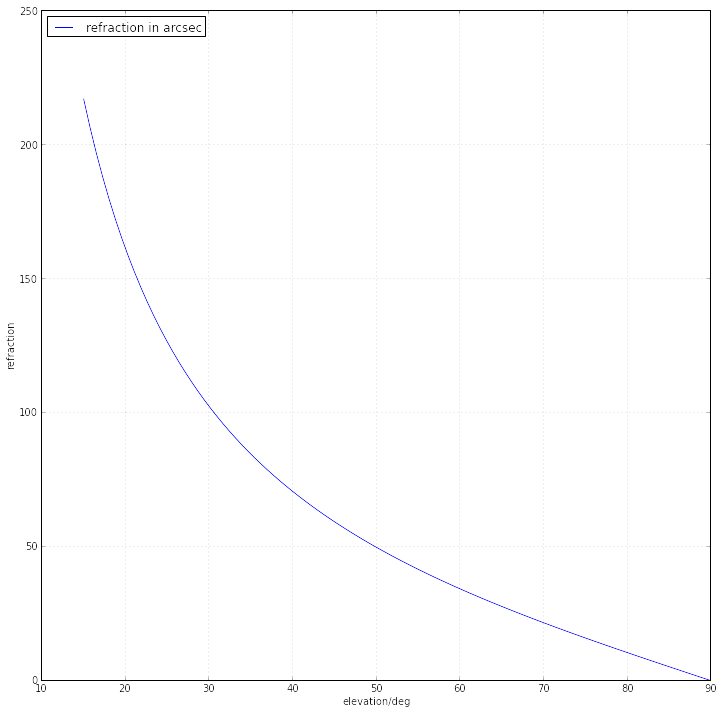

In [30]:
el=np.linspace(15,90,100)
n1=0.00026
pylab.xlabel('elevation/deg')
pylab.ylabel('refraction')
plot(el,refract(n1,el),label='refraction in arcsec')
pylab.legend(loc='upper left')
pylab.grid()
pylab.show()

In [31]:
"""
at 1.8GHz and 900mbar press 30C, 20%humid MPM3P gives refraction 230ppm att 0.0048dB/km

The non-resonant term is the only important one at low freq, which is basically pressure

"""
def dB(x):
    at=10**(0.1*x)
    return at
depth=7
print "Attenuated by", (dB(depth*0.0048)-1)*100,"% for ",depth,"km atmosphere"

def neper(x):
    # 1 neper = 8.68588 dB for powers
    # half that for voltages
    at=np.exp(x)
    return at
print dB(0.5*8.68588), neper(1)
print neper(0.007)

Attenuated by 0.7766691398 % for  7 km atmosphere
2.71827881219 2.71828182846
1.00702455727


In [32]:
frq=np.array([.10,.15,.205,.30,.325,.35,.40,.55,.70,1.0,1.52,2.0,3.0,3.4,\
     4.0,4.9,8.3,10.2,15.0,17.0,20.0,22.0,23.0,25.0,26.,30.,32.0,33.,\
     35,37.,38.,40.,42.,43.,44.,47.,48.,51.,54.,58.,59.,60.,61.,62.,63,\
     64.,68.,70.,72.,76.,84.])
dry=np.array([.00019,.00042,.00070,.00096,.0013,.0015,.0018,.0024,0.003,.0042,.005,.007,.0088,.0092,.010,\
     .011,.014,.015,.017,.018,.020,.021,.022,.024,.027,.030,.032,.035,.040,.044,.050,.060,.070,\
     .090,.100,.15,.23,.50,1.8,4.0,7.0,15.0,8.0,5.0,3.0,1.7,1.2,.90,.50,.35,.20,.14,.10])
wet=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,.0001,.00017,.00034,.0021,.009,.025,.045,.10,.22,\
     0.20,.16,.15,.11,.14,.10,.099,.098,.0963,.0967,.0981,.0987,.099,.100,\
     .101,.103,.109,.118,.120,.122,.127,.130,.132,.138,.154,.161,.175,\
     .20,.25,.34,.56])
print len(frq),len(dry),len(wet)
print (dry+wet)[:19]

51 53 53
[ 0.00019  0.00042  0.0007   0.00096  0.0013   0.0015   0.0018   0.0024
  0.003    0.0042   0.005    0.007    0.0088   0.0093   0.01017  0.01134
  0.0161   0.024    0.042  ]


'\nsee FAA-RD-80-1\n'

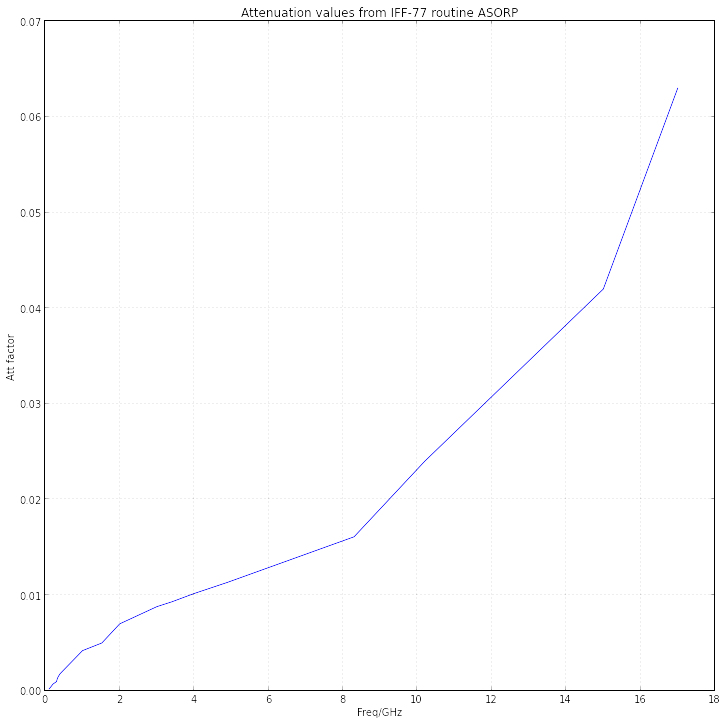

In [33]:
plot(frq[:20],(dry+wet)[:20])
pylab.xlabel('Freq/GHz')
pylab.ylabel('Att factor')
pylab.grid()
pylab.title('Attenuation values from IFF-77 routine ASORP')
"""
see FAA-RD-80-1
"""

In [34]:
"""
Elgered model has T_atm=T_ground -15K

"""

'\nElgered model has T_atm=T_ground -15K\n\n'

1.085651747e-07


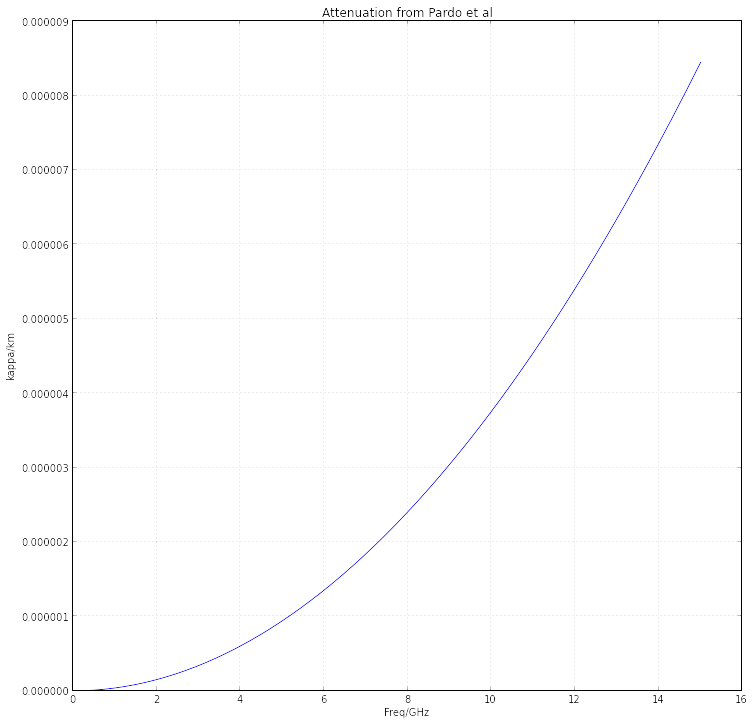

In [35]:
"""
Pardo, Cernicharo & Serabyn IEEE Ant&prop 49, p 1683 2001
give model for microwave to THz for pseudocontinuum
"""
def k(pd,pw,T,freq): # scales from per m to per km
    # T was C, freq in GHz, pd in millibar
    k_dry =  2.612e-3*(pd/1013.0)**2 * (300/(T+273.15))**3.5 * (freq/225.0)**2
    k_wet=31.5*(freq/225.0)**2 * (pw/1013)*(pd/1013) *(300/(T+273.15))**3
    return k_dry+k_wet
T=30.0
pd=880
pw=12
print k(880,12,40,1.8)
freq=np.linspace(0,15,180)
pylab.plot(freq,k(pd,pw,T,freq),label='Attenuation at '+str(T)+'C and dry pressure'+str(pd)+'mbar')
pylab.xlabel('Freq/GHz')
pylab.ylabel('kappa/km')
pylab.grid()
pylab.title('Attenuation from Pardo et al')

           
                                      
                                      
                              
                                  

In [36]:
"""
Green Bank Telescope zenith Opacity - should be close to KAT Values in GHz
"""

def gbtzo(freq):
    tau=np.ones(len(freq))*0.2
    #print tau  
    ix=np.where(freq<18.0001)
    #print ix
    tau[ix]=0.008 + np.exp(np.sqrt(freq[ix]))/8000.0
    iy=np.where(freq>18.0)
    #print iy
    tau[iy]=0.008 + np.exp(np.sqrt((freq[iy])))/8000.0 +np.exp(-0.5*(22.2 - freq[iy])**2)/40.0
    iz=np.where(freq>26) # back to normal past water line
    tau[iz]=0.008 + np.exp(np.sqrt(freq[iz]))/8000.0
    izz=np.where(freq>52) # not valid beyond 52GHz
    tau[izz]=0.2
    return tau # are these in nepers?

test=np.linspace(0.5,13,10)
print test,gbtzo(test)

[  0.5          1.88888889   3.27777778   4.66666667   6.05555556
   7.44444444   8.83333333  10.22222222  11.61111111  13.        ] [ 0.00825351  0.00849407  0.00876416  0.00908416  0.00946428  0.00991364
  0.01044159  0.01105806  0.01177374  0.01260025]


In [37]:
def vlatab(freq,pwv=12): #EVLA memo 143 - Marvil
    f=np.arange(1,23.75,0.25)
    a=np.array([ 5.272, 5.464, 5.579, 5.654, 5.707, 5.748, 5.780, 5.808, 5.832, 5.855, 5.876, 5.897,\
                5.918, 5.939, 5.960, 5.981, 6.003, 6.026, 6.049, 6.073, 6.098, 6.123, 6.150, 6.178,\
                6.206, 6.235, 6.266, 6.297, 6.330, 6.364, 6.398, 6.435, 6.473, 6.522, 6.550, 6.590,\
                6.635, 6.726, 6.722, 6.766, 6.835, 6.864, 6.905, 6.954, 7.003, 7.055, 7.109, 7.164,\
                7.220, 7.277, 7.336, 7.396, 7.458, 7.521, 7.586, 7.661, 7.726, 7.785, 7.854, 7.924, \
                8.000, 8.081, 8.144, 8.219, 8.296, 8.375, 8.456, 8.540, 8.634, 8.724, 8.819, 8.920,\
                9.028, 9.147, 9.281, 9.435, 9.615, 9.830, 10.090, 10.404, 10.776, 11.204, 11.669,\
                12.129, 12.523, 12.782, 12.872, 12.815, 12.667, 12.491, 12.335])
    a=a/1000.
    b=np.array([0.000, 0.000, 0.001, 0.002, 0.003, 0.005, 0.006, 0.008, 0.009, 0.011, 0.013, 0.016,\
                0.018, 0.021, 0.023, 0.026, 0.030, 0.033, 0.037, 0.040, 0.044, 0.048, 0.052, 0.057,\
                0.061, 0.066, 0.071, 0.077, 0.082, 0.088, 0.094, 0.100, 0.107, 0.114, 0.122, 0.129,\
                0.137, 0.146, 0.155, 0.164, 0.174, 0.185, 0.196, 0.207, 0.220, 0.233, 0.247, 0.262,\
                0.277, 0.294, 0.312, 0.331, 0.352, 0.374, 0.398, 0.423, 0.451, 0.482, 0.516, 0.553,\
                0.593, 0.638, 0.688, 0.744, 0.806, 0.876, 0.955, 1.045, 1.148, 1.265, 1.400, 1.557,\
                1.738, 1.949, 2.195, 2.483, 2.820, 3.214, 3.670, 4.194, 4.786, 5.436, 6.117, 6.778,\
                7.328, 7.638, 7.625, 7.351, 6.924, 6.426, 5.914])
    b=b/1000.
    #print len(f),len(a),len(b)
    estimate=a+b*pwv
    #PWV is in mm - guess in the range 10-15

    
    att=np.interp(freq,f,estimate,right=estimate[-1],left=estimate[0])
    return att
print vlatab(1.822)

0.00569672


In [38]:
def wsrtmodel(freq):
    """
    in NEWSTAR ncalib extinction (at zqwenith)
    not valid above 8GHz
    online values are
                  0 < FREQ <=  500 Mhz : 0.005
                500 < FREQ <= 1000 Mhz : 0.008
               1000 < FREQ <= 3000 Mhz : 0.011
               3000 < FREQ <= 6000 Mhz : 0.015
    but 6cm value known to go up to 0.035

    """
    ext=np.ones(len(freq))*0.015
    a=0.00557
    b=0.00461
    c=-0.000544
    ext=a+b*freq +c*freq*freq
    hi=np.where(freq>3.5)
    ext[hi]=0.015
    return ext

In [39]:
def vlafit(freq):
    """
    fitted to the VLA opacity table in sections
    """
    ext=np.ones(len(freq))*4.6
    ix=np.where(freq<2.0)
    ext[ix]=4.6+0.2*freq
    ix=np.where(freq>2.0)
    ext[ix]=5.5+0.1*freq
    ix=np.where(freq >8.0)
    ext[ix]=4.4+np.exp(0.08*freq)
    return ext*0.001
print vlafit(np.linspace(1.4,9,10))

[ 0.00488     0.00564     0.00572444  0.00580889  0.00589333  0.00597778
  0.00606222  0.00614667  0.00551851  0.00559669]


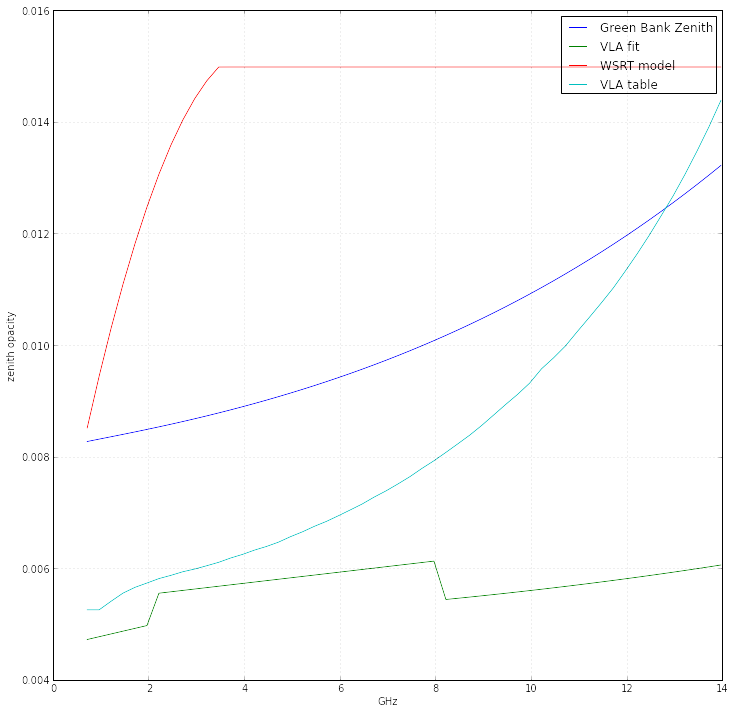

In [40]:
freq=np.arange(0.7,14.,0.25)
T=273 ; pd=900 ; pw=12
plot(freq,gbtzo(freq),label='Green Bank Zenith')
plot(freq,vlafit(freq),label='VLA fit')
plot(freq,wsrtmodel(freq),label='WSRT model')
plot(freq,vlatab(freq,20),label='VLA table')
pylab.xlabel('GHz')
pylab.ylabel('zenith opacity')
pylab.grid()
pylab.legend()
pylab.show()

In [41]:
"""
precipitable water vapour at GBT typical good value ~ 5mm
at alma ~1mm
hartrao 20mm
"""

'\nprecipitable water vapour at GBT typical good value ~ 5mm\nat alma ~1mm\nhartrao 20mm\n'

In [42]:
"""
Zenith delay model from IERS technical note 36
 1 − 0.00266 cos 2φ − 0.00000028H
height in metres
pressure in millibar
delay in metres
"""
def f(lat=-30.7,height=1038.0):
    fun=1 -0.00266 *np.cos(2*np.radians(lat)) -0.00000028*height
    return fun

def delay(press,lat,height): #hydrostatic delay at zenith - no wet component
    d=0.0022768*press/f(lat,height)
    return d

print delay(900,-30.7,1038),"metres"

2.05232976236 metres


from unknown source: at zenith angle z

$refraction = 58.294" tan(z) - 0.0668" tan^3(z)$

to convert to radians divide by 206265, to degrees divide by 3600

In [45]:
def ref2(el):
    z=np.radians(90.-el) #el in degrees
    t=np.tan(z)
    a=58.294
    b=0.0668
    r=a*t - b*t
    return r
    
print ref2(15.)
    

217.306868782


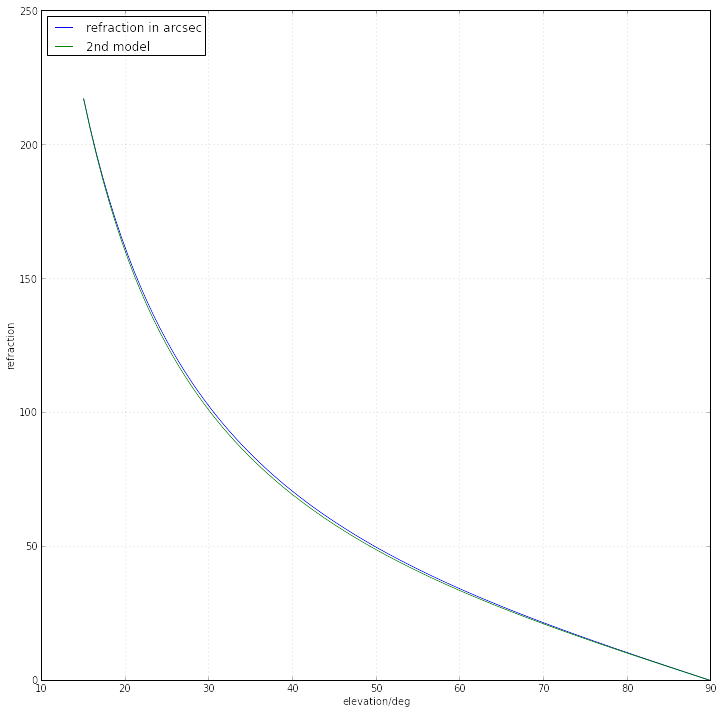

In [44]:
el=np.linspace(15,90,100)
n1=0.00026
pylab.xlabel('elevation/deg')
pylab.ylabel('refraction')
plot(el,refract(n1,el),label='refraction in arcsec')
plot(el,ref2(el),label='2nd model')
pylab.legend(loc='upper left')
pylab.grid()
pylab.show()